<a href="https://colab.research.google.com/github/Befezdow/ai_test/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



In [2]:
drive.mount('/content/gdrive')
!ls '/content/gdrive/My Drive/ML/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
AWESOME_DATA.csv  half.csv  preview.csv


Загружаем данные из csv:

In [3]:
names_array = ['gender', 'age', 'class1', 'class2', 'class3', *['t{}'.format(i + 1) for i in range(60000)]]
url = '/content/gdrive/My Drive/ML/half.csv'
data = pd.read_csv(url, names=names_array)
data

,gender,age,class1,class2,class3,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,Female,85,3,NaN,NaN,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,...,-0.026842,-0.028914,-0.028548,-0.029272,-0.031896,-0.036031,-0.039794,-0.033593,-0.028113,-0.031301,-0.041995,-0.045999,-0.043968,-0.039291,-0.030942,-0.031698,-0.030754,-0.033479,-0.033446,-0.036413,-0.038551,-0.035920,-0.036477,-0.036518,-0.041184,-0.039042,-0.033992,-0.033940,-0.031528,-0.026267,-0.028246,-0.028318,-0.025569,-0.021279,-0.018593,-0.032023,-0.046202,-0.042003,-0.034466,-0.039000
1,Male,79,9,NaN,NaN,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,...,-0.934049,-0.949376,-0.962051,-0.963686,-0.961742,-0.952030,-0.939060,-0.934415,-0.936366,-0.939326,-0.932011,-0.926725,-0.928331,-0.929013,-0.921389,-0.906309,-0.900787,-0.901273,-0.895911,-0.893740,-0.891627,-0.885869,-0.881577,-0.873489,-0.866113,-0.865862,-0.859139,-0.852907,-0.843380,-0.833925,-0.833698,-0.836701,-0.827418,-0.827810,-0.816231,-0.819793,-0.797862,-0.819597,-0.771195,-0.845490
2,Male,66,3,NaN,NaN,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,...,-0.051053,-0.052053,-0.051053,-0.049053,-0.047053,-0.044053,-0.040053,-0.037053,-0.036053,-0.034053,-0.034053,-0.034053,-0.033053,-0.031053,-0.028053,-0.025053,-0.022053,-0.019053,-0.017053,-0.017053,-0.016053,-0.016053,-0.014053,-0.013053,-0.010053,-0.007053,-0.003053,0.001947,0.004947,0.007947,0.009947,0.011947,0.012947,0.015947,0.018947,0.023947,0.027947,0.030947,0.034947,0.037947
3,Male,93,2,NaN,NaN,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,...,-0.117502,-0.208445,-0.254530,-0.270954,-0.254278,-0.223832,-0.205055,-0.179093,-0.157585,-0.127692,-0.089728,-0.074150,-0.056856,-0.038932,-0.024184,-0.016817,-0.014031,-0.011765,-0.022771,-0.023586,-0.013769,-0.004949,-0.003625,-0.013567,-0.019471,-0.015372,-0.021787,-0.028885,-0.028997,-0.021737,-0.013160,-0.006182,-0.003825,-0.002177,-0.001466,-0.006676,-0.011236,-0.016540,-0.016289,-0.022542
4,Male,65,2,NaN,NaN,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,...,1.016910,0.710028,0.406775,0.104651,-0.181270,-0.432753,-0.645005,-0.816434,-0.952654,-1.038151,-1.073172,-1.060904,-1.006902,-0.914312,-0.803500,-0.697

In [4]:
data = data.drop('class2', axis = 1)
data = data.drop('class3', axis = 1)
data

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,Female,85,3,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,-0.068795,-0.070163,...,-0.026842,-0.028914,-0.028548,-0.029272,-0.031896,-0.036031,-0.039794,-0.033593,-0.028113,-0.031301,-0.041995,-0.045999,-0.043968,-0.039291,-0.030942,-0.031698,-0.030754,-0.033479,-0.033446,-0.036413,-0.038551,-0.035920,-0.036477,-0.036518,-0.041184,-0.039042,-0.033992,-0.033940,-0.031528,-0.026267,-0.028246,-0.028318,-0.025569,-0.021279,-0.018593,-0.032023,-0.046202,-0.042003,-0.034466,-0.039000
1,Male,79,9,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,-0.021534,-0.024676,...,-0.934049,-0.949376,-0.962051,-0.963686,-0.961742,-0.952030,-0.939060,-0.934415,-0.936366,-0.939326,-0.932011,-0.926725,-0.928331,-0.929013,-0.921389,-0.906309,-0.900787,-0.901273,-0.895911,-0.893740,-0.891627,-0.885869,-0.881577,-0.873489,-0.866113,-0.865862,-0.859139,-0.852907,-0.843380,-0.833925,-0.833698,-0.836701,-0.827418,-0.827810,-0.816231,-0.819793,-0.797862,-0.819597,-0.771195,-0.845490
2,Male,66,3,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,0.008492,0.008492,...,-0.051053,-0.052053,-0.051053,-0.049053,-0.047053,-0.044053,-0.040053,-0.037053,-0.036053,-0.034053,-0.034053,-0.034053,-0.033053,-0.031053,-0.028053,-0.025053,-0.022053,-0.019053,-0.017053,-0.017053,-0.016053,-0.016053,-0.014053,-0.013053,-0.010053,-0.007053,-0.003053,0.001947,0.004947,0.007947,0.009947,0.011947,0.012947,0.015947,0.018947,0.023947,0.027947,0.030947,0.034947,0.037947
3,Male,93,2,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,0.059849,0.036704,...,-0.117502,-0.208445,-0.254530,-0.270954,-0.254278,-0.223832,-0.205055,-0.179093,-0.157585,-0.127692,-0.089728,-0.074150,-0.056856,-0.038932,-0.024184,-0.016817,-0.014031,-0.011765,-0.022771,-0.023586,-0.013769,-0.004949,-0.003625,-0.013567,-0.019471,-0.015372,-0.021787,-0.028885,-0.028997,-0.021737,-0.013160,-0.006182,-0.003825,-0.002177,-0.001466,-0.006676,-0.011236,-0.016540,-0.016289,-0.022542
4,Male,65,2,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,0.004789,-0.007276,...,1.016910,0.710028,0.406775,0.104651,-0.181270,-0.432753,-0.645005,-0.816434,-0.952654,-1.038151,-1.0731

In [5]:
data['class1'].unique()

array([3, 9, 2, 5, 1, 7, 6, 4, 8])

In [6]:
data.describe(include = 'all')

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
count,1250,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,65.856000,4.007200,-0.001139,-0.002105,-0.001186,-0.000699,0.000080,0.001231,0.001647,0.000844,-0.000507,-0.001404,-0.000979,0.000224,0.001310,0.001309,0.001362,0.001244,0.001325,0.000977,-0.000244,-0.001267,-0.001956,-0.002275,-0.002705,-0.003862,-0.003565,-0.002761,-0.002193,-0.001470,-0.000565,0.000766,0.001641,0.001913,0.002586,0.003234,0.003087,0.003314,0.003607,...,-0.000564,0.000351,0.001139,0.002124,0.003319,0.003851,0.003792,0.004112,0.004451,0.004071,0.003836,0.003528,0.002257,0.000447,-0.001505,-0.003825,-0.005995,-0.007449,-0.008046,-0.008391,-0.008372,-0.008107,-0.007929,-0.007539,-0.006885,-0.006192,-0.005158,-0.003966,-0.002890,-0.002123,-0.001556,-0.001544,-0.002460,-0.004072,-0.005804,-0.008189,-0.010095,-0.012380,-0.012375,-0.014290
std,NaN,16.259704,2.206863,0.109153,0.147960,0.142419,0.154217,0.156632,0.164304,0.167253,0.160772,0.148017,0.144894,0.151951,0.161172,0.163977,0.162418,0.158913,0.155349,0.152982,0.148850,0.139679,0.135292,0.136578,0.136331,0.134528,0.133113,0.132706,0.133541,0.135828,0.138968,0.139904,0.141987,0.145540,0.148112,0.150525,0.152528,0.154053,0.154859,0.156462,...,0.289376,0.290498,0.293803,0.299285,0.304464,0.308960,0.312213,0.314095,0.315738,0.317939,0.320239,0.321139,0.319850,0.316424,0.310127,0.299973,0.289762,0.281493,0.273258,0.265423,0.259596,0.256717,0.255889,0.257820,0.261944,0.266477,0.273977,0.286926,0.302027,0.312504,0.316296,0.316760,0.314992,0.311292,0.299572,0.288294,0.273217,0.274725,0.260574,0.281653
min,NaN,8.000000,1.000000,-1.016408,-1.434000,-1.275380,-1.341125,-1.282850,-1.300322,-1.297810,-1.333237,-1.32840

In [7]:
data['age'].unique()

array([85, 79, 66, 93, 65, 55, 82, 87, 51, 61, 90, 77, 70, 60, 62, 59, 84,
       71, 45, 48, 75, 49, 72, 78, 86, 46, 94, 33, 74, 64, 67, 63, 88, 32,
       92, 68, 76, 54, 89, 31, 80, 30, 57, 83, 34, 27, 73, 69, 52, 44, 43,
       47, 39, 56, 81, 53, 50, 16, 29, 37, 58, 24, 22, 40, 41, 11, 26, 28,
       96, 35, 91, 25, 36, 23, 19, 17, 42, 18, 15,  8, 20, 38, 14, 21])

Заполняем пустые значения медианой соостветсвующего столбца:

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [9]:
data['age'].unique()

array([85, 79, 66, 93, 65, 55, 82, 87, 51, 61, 90, 77, 70, 60, 62, 59, 84,
       71, 45, 48, 75, 49, 72, 78, 86, 46, 94, 33, 74, 64, 67, 63, 88, 32,
       92, 68, 76, 54, 89, 31, 80, 30, 57, 83, 34, 27, 73, 69, 52, 44, 43,
       47, 39, 56, 81, 53, 50, 16, 29, 37, 58, 24, 22, 40, 41, 11, 26, 28,
       96, 35, 91, 25, 36, 23, 19, 17, 42, 18, 15,  8, 20, 38, 14, 21])

In [0]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object' and c != 'class1']

Векторизируем колонку gender:

In [11]:
data.at[data['gender'] == 'Male', 'gender'] = 0
data.at[data['gender'] == 'Female', 'gender'] = 1
data['gender'].describe()

count    1250.000000
mean        0.392800
std         0.488568
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Нормализуем числовые атрибуты:


In [0]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data[numerical_columns] = data_numerical

In [13]:
data

,gender,age,class1,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,...,t59961,t59962,t59963,t59964,t59965,t59966,t59967,t59968,t59969,t59970,t59971,t59972,t59973,t59974,t59975,t59976,t59977,t59978,t59979,t59980,t59981,t59982,t59983,t59984,t59985,t59986,t59987,t59988,t59989,t59990,t59991,t59992,t59993,t59994,t59995,t59996,t59997,t59998,t59999,t60000
0,1,1.177389,3,0.040129,0.096225,0.167277,0.075557,-0.159423,-0.206825,-0.197778,-0.272026,-0.325317,-0.252261,-0.170036,-0.108211,-0.098335,-0.158108,-0.184473,-0.246856,-0.313678,-0.360217,-0.390474,-0.391091,-0.240892,-0.157343,-0.253050,-0.210199,-0.138257,-0.266366,-0.318261,-0.309616,-0.300098,-0.278459,-0.307338,-0.385046,-0.429764,-0.429654,-0.426615,-0.465647,-0.471491,...,-0.090811,-0.100739,-0.101043,-0.104901,-0.115662,-0.129084,-0.139603,-0.120045,-0.103134,-0.111256,-0.143116,-0.154222,-0.144520,-0.125586,-0.094920,-0.092917,-0.085447,-0.092473,-0.092952,-0.105574,-0.116254,-0.108342,-0.111562,-0.112401,-0.130940,-0.123274,-0.105242,-0.104466,-0.094821,-0.077259,-0.084381,-0.084524,-0.073364,-0.055277,-0.042690,-0.082671,-0.132154,-0.107830,-0.084780,-0.087732
1,0,0.808379,9,0.120865,0.129241,0.120330,0.140320,0.133305,0.121282,0.116017,0.125757,0.146123,0.156541,0.181061,0.161385,0.089810,0.074230,0.074634,0.045784,0.027654,0.046762,0.063265,0.071435,0.076902,0.078073,0.084612,0.075853,0.031772,0.006771,0.003544,-0.040128,-0.060321,-0.090008,-0.143582,-0.141381,-0.146841,-0.145241,-0.150689,-0.160460,-0.180768,...,-3.225854,-3.269312,-3.278351,-3.227052,-3.169699,-3.093861,-3.019905,-2.988033,-2.979736,-2.967232,-2.922340,-2.896735,-2.909451,-2.937391,-2.966156,-3.008550,-3.088029,-3.175302,-3.249175,-3.335607,-3.402420,-3.419178,-3.414167,-3.358736,-3.280200,-3.226058,-3.116982,-2.958748,-2.782832,-2.661734,-2.630893,-2.636564,-2.618976,-2.646196,-2.705287,-2.815192,-2.883302,-2.938272,-2.912115,-2.951146
2,0,0.008856,3,-0.076674,-0.043271,-0.058429,-0.050635,-0.048443,-0.047098,-0.048755,-0.045728,-0.033786,-0.035224,-0.029805,-0.029361,-0.029382,-0.035815,-0.036938,-0.037024,-0.044664,-0.036851,-0.023369,-0.023956,-0.011363,-0.001708,0.016336,0.017682,0.023038,0.016872,0.005048,-0.000269,-0.006739,-0.008970,-0.007892,0.003913,0.019310,0.021360,0.028598,0.033437,0.031222,...,-0.174477,-0.180393,-0.177642,-0.170996,-0.165443,-0.155048,-0.140433,-0.131059,-0.128282,-0.119910,-0.118315,-0.117024,-0.110396,-0.099550,-0.085603,-0.070766,-0.055419,-0.041225,-0.032960,-0.032634,-0.029587,-0.030951,-0.023931,-0.021389,-0.012095,-0.003231,0.007682,0.020608,0.025947,0.032225,0.036368,0.042591,0.048913,0.064308,0.082621,0.111471,0.139239,0.157709,0.181605,0.185466
3,0,1.669403,2,-0.010375,0.042460,-0.006251,-0.033565,-0.030421,-0.056894,-0.127759,-0.230320,-0.250710,-0.165077,-0.146230,-0.223169,-0.273174,-0.195657,-0.150855,-0.075853,0.022744,0.130060,0.214147,0.137841,0.049002,0.036897,0.124736,0.146780,0.042113,0.001624,0.016652,0.012534,0.087339,0.155223,0.185451,0.188517,0.186005,0.210408,0.314170,0.365076,0.211533,...,-0.404104,-0.718751,-0.870203,-0.912433,-0.846065,-0.736931,-0.668926,-0.583278,-0.513196,-0.414430,-0.292169,-0.241882,-0.184815,-0.124449,-0.073126,-0.043311,-0.027734,-0.015333,-0.053885,-0.057248,-0.020791,0.012301,0.016820,-0.023383,-0.048049,-0.034448,-0.060697,-0.086848,-0.086439,-0.062764,-0.036685,-0.014641,-0.004332,0.006085,0.014482,0.005250,-0.004174,-0.015146,-0.015022,-0.029297
4,0,-0.052645,2,-0.269905,-0.171126,-0.089429,-0.149424,-0.157390,-0.227071,-0.217555,-0.090278,-0.061240,-0.145186,-0.210956,-0.204050,-0.118863,-0.114682,-0.200981,-0.219328,-0.076020,0.028953,0.049681,-0.008024,-0.026382,-0.022638,-0.041241,0.045352,0.083616,0.040611,0.018914,-0.044803,-0.117310,-0.075078,-0.013943,-0.094790,-0.069258,-0.037400,-0.054003,0.009524,-0.069556,...,3.516089,2.442972,1.380641,0.342574,-0.606273,-1.413138,-2.078062,-2.612410,-3.031321,-3.278060,-3.363

Бьем данные на входы и выходы:

In [0]:
x = data.drop('class1', axis = 1) # TODO replace gender with class
y = data['class1']

Применяем PCA с 2 компонентами и выводим значения получившихся компонент:

In [15]:
from sklearn import decomposition

components_count = 2
pca = decomposition.PCA(n_components=components_count)
principal_components = pca.fit_transform(x)
principal_x = pd.DataFrame(
    data = principal_components, 
    columns = ['pc{}'.format(i + 1) for i in range(components_count)]
)
principal_x

,pc1,pc2
0,0.394545,-0.881562
1,-3.864330,-12.881573
2,1.810006,0.981109
3,-0.525175,-6.861418
4,-1.584888,6.782562
...,...,...
1245,-2.773750,-1.296103
1246,1.177563,-4.174874
1247,-0.415049,-5.508264
1248,-5.614613,-3.112785


Выведем получившиеся данные:

In [16]:
new_data = principal_x
new_data['class1'] = y
new_data

,pc1,pc2,class1
0,0.394545,-0.881562,3
1,-3.864330,-12.881573,9
2,1.810006,0.981109,3
3,-0.525175,-6.861418,2
4,-1.584888,6.782562,2
...,...,...,...
1245,-2.773750,-1.296103,2
1246,1.177563,-4.174874,7
1247,-0.415049,-5.508264,2
1248,-5.614613,-3.112785,3


Отрисуем точки двумерного пространства:

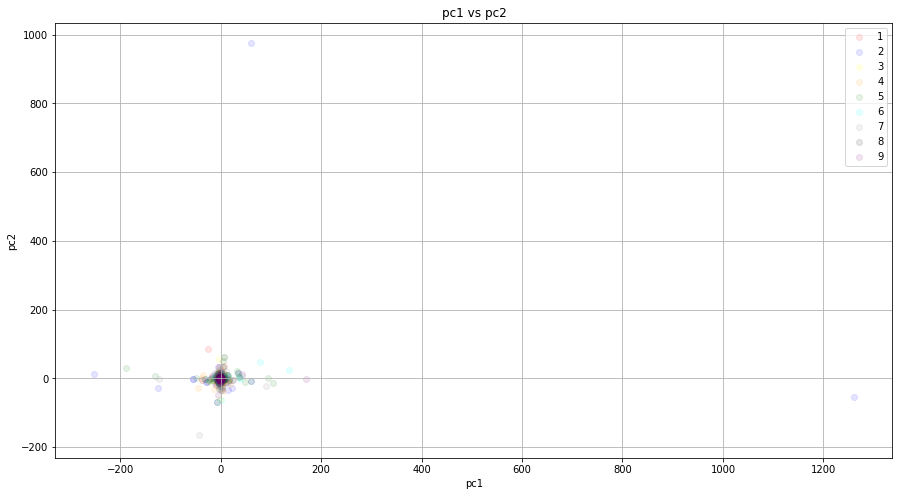

In [17]:
plt.figure(figsize = (15, 8))

plt.scatter(
    new_data[new_data['class1'] == 1]['pc1'],
    new_data[new_data['class1'] == 1]['pc2'],
    alpha = 0.1,
    label = '1',
    color = 'red'
)

plt.scatter(
    new_data[new_data['class1'] == 2]['pc1'],
    new_data[new_data['class1'] == 2]['pc2'],
    alpha = 0.1,
    label = '2',
    color = 'blue'
)

plt.scatter(
    new_data[new_data['class1'] == 3]['pc1'],
    new_data[new_data['class1'] == 3]['pc2'],
    alpha = 0.1,
    label = '3',
    color = 'yellow'
)

plt.scatter(
    new_data[new_data['class1'] == 4]['pc1'],
    new_data[new_data['class1'] == 4]['pc2'],
    alpha = 0.1,
    label = '4',
    color = 'orange'
)

plt.scatter(
    new_data[new_data['class1'] == 5]['pc1'],
    new_data[new_data['class1'] == 5]['pc2'],
    alpha = 0.1,
    label = '5',
    color = 'green'
)

plt.scatter(
    new_data[new_data['class1'] == 6]['pc1'],
    new_data[new_data['class1'] == 6]['pc2'],
    alpha = 0.1,
    label = '6',
    color = 'cyan'
)

plt.scatter(
    new_data[new_data['class1'] == 7]['pc1'],
    new_data[new_data['class1'] == 7]['pc2'],
    alpha = 0.1,
    label = '7',
    color = 'gray'
)

plt.scatter(
    new_data[new_data['class1'] == 8]['pc1'],
    new_data[new_data['class1'] == 8]['pc2'],
    alpha = 0.1,
    label = '8',
    color = 'black'
)

plt.scatter(
    new_data[new_data['class1'] == 9]['pc1'],
    new_data[new_data['class1'] == 9]['pc2'],
    alpha = 0.1,
    label = '9',
    color = 'purple'
)

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pc1 vs pc2')
plt.legend()
plt.grid()

Разобьем данные на обучающую и тестовую выборки для обучения алгоритма:

In [18]:
from sklearn.model_selection import train_test_split

new_x = data.drop('class1', axis = 1)
new_y = data['class1']

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state = 42)

n_train, _ = x_train.shape 
n_test,  _ = x_test.shape 

print(n_train, n_test)

875 375


Определим наиболее подходящее кол-во соседей:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.712 45


Применим метод 45 ближайших соседей и выведем ошибку на тестовых данных:

In [24]:
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.7466666666666667

Посчитаем ошибки для разного количества компонент и нарисуем график зависимости ошибки:

43 0.704


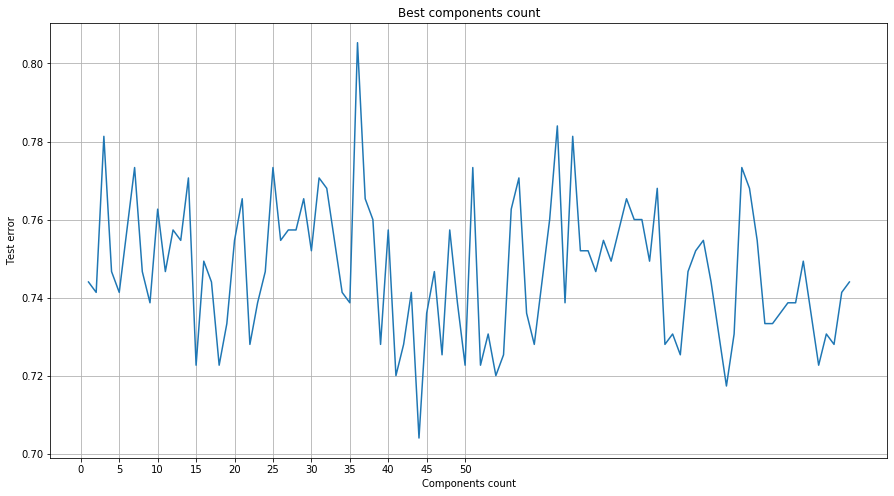

In [32]:
max_components_count = 100
test_errors = []
for components_count in range(1, max_components_count + 1):
  pca = decomposition.PCA(n_components=components_count)
  principal_components = pca.fit_transform(x)
  principal_x = pd.DataFrame(data = principal_components)

  x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size = 0.3, random_state = 42)

  knn = KNeighborsClassifier(n_neighbors = 45)
  knn.fit(x_train, y_train)

  y_test_predict = knn.predict(x_test)
  err_test = np.mean(y_test != y_test_predict)
  test_errors.append(err_test)

min_error = min(test_errors)
print(test_errors.index(min_error), min_error)

plt.figure(figsize = (15, 8))
plt.plot(
    [i for i in range(1, max_components_count + 1)],
    test_errors
)

plt.xlabel('Components count')
plt.ylabel('Test error')
plt.title('Best components count')
plt.xticks(np.arange(0, 101, 5))
plt.grid()

Ошибка на 45 соседях без применения PCA составляет 0.7466666666666667. C использованием PCA минимальная ошибка составляет 0.704. Соответственно, при применении PCA можем наблюдать уменьшение ошибки. Эмпирически было вычислено, что наилучшее число компонент - 43. 